### Visualising the data

#### What files are in the input folder:

In [1]:
import os 
print('No. of files: {}'.format(str(len(os.listdir("./input")))))
print(os.listdir("./input"))

No. of files: 8
['Data_Dictionary.xlsx', 'historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'readme.md', 'sample_submission.csv', 'test.csv', 'train.csv']


##### Train and Test files

In [2]:
import pandas as pd

e = pd.read_excel('./input/Data_Dictionary.xlsx', sheetname='train')
e

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


In [3]:
#Loading Train and Test Data

df_train = pd.read_csv("./input/train.csv", parse_dates=["first_active_month"])
df_test = pd.read_csv("./input/test.csv", parse_dates=["first_active_month"])
print("{} observations and {} features in train set.".format(df_train.shape[0],df_train.shape[1]))
print("{} observations and {} features in test set.".format(df_test.shape[0],df_test.shape[1]))

201917 observations and 6 features in train set.
123623 observations and 5 features in test set.


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB


In [5]:
df_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [6]:
df_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


Let's now look at the target score 

In [7]:
df_train.target.describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

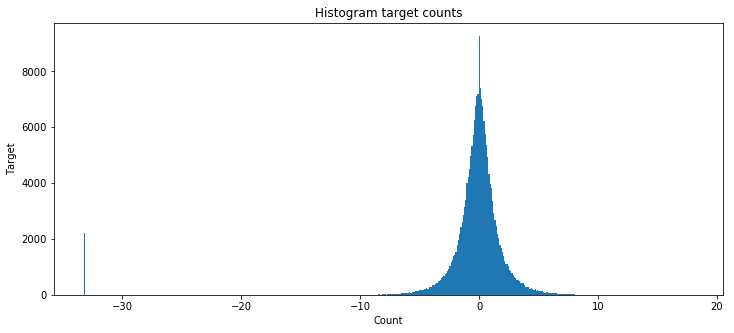

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(df_train.target.values, bins=500)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

In [9]:
print('There are {0} samples with target lower than -25.'.format(df_train.loc[df_train.target < -25].shape[0]))

There are 2207 samples with target lower than -25.


In [10]:
# sort values
df_train = df_train.sort_values(by=['target'], axis=0)

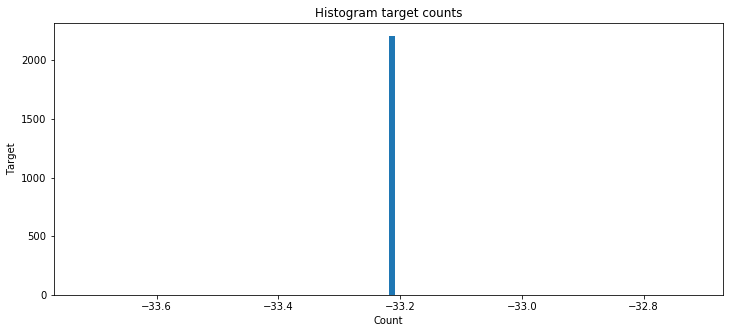

count    2.207000e+03
mean    -3.321928e+01
std      1.193982e-12
min     -3.321928e+01
25%     -3.321928e+01
50%     -3.321928e+01
75%     -3.321928e+01
max     -3.321928e+01
dtype: float64

In [11]:
plt.figure(figsize=(12, 5))
plt.hist(df_train.target.values[:2207], bins=100)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

df_train_outliers = pd.Series(df_train.target.values[:2207])
df_train_outliers.describe()

One unique target value for 2207 outliers: -33.21928


Let's now look at the distributions of various "features"

Feature 1

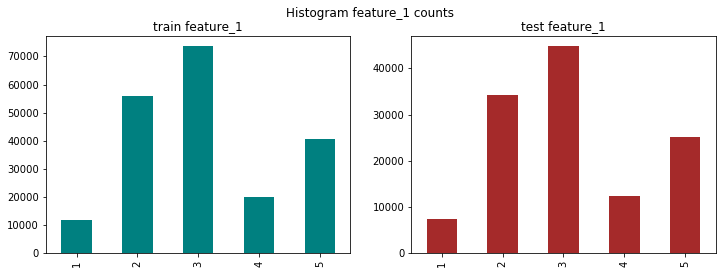

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4));
df_train['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='train feature_1');
df_test['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='test feature_1');
plt.suptitle('Histogram feature_1 counts');
plt.show()

Feature 2

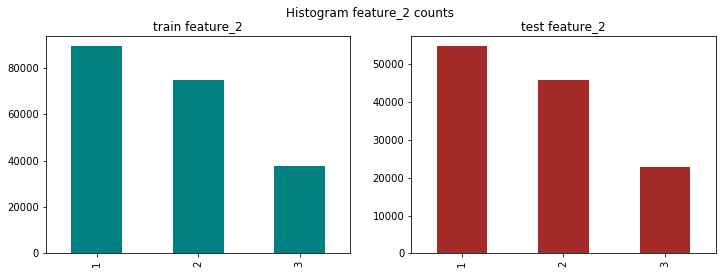

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4));
df_train['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='train feature_2');
df_test['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='test feature_2');
plt.suptitle('Histogram feature_2 counts');
plt.show()

Feature 3

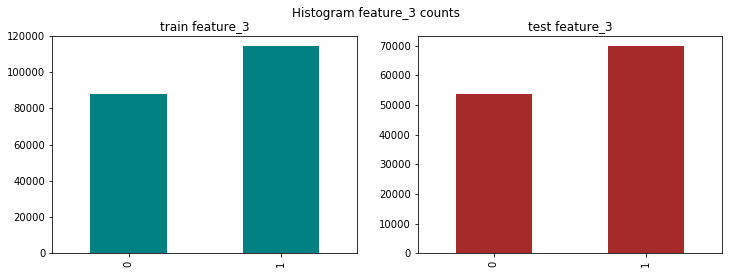

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4));
df_train['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='train feature_3');
df_test['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='test feature_3');
plt.suptitle('Histogram feature_3 counts');
plt.show()

- These two plots show an important idea: while different categories of these features could have various counts, the distribution of target is almost the same. This could mean, that these features aren't really good at predicting target - we'll need other features and feature engineering. Also it is worth noticing that mean target values of each catogory of these features is near zero. This could mean that data was sampled from normal distribution.
    

In [15]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

d1 = df_train['first_active_month'].value_counts().sort_index()
d2 = df_test['first_active_month'].value_counts().sort_index()
data = [go.Scatter(x=d1.index, y=d1.values, name='train'), go.Scatter(x=d2.index, y=d2.values, name='test')]
layout = go.Layout(dict(title = "Counts of first active",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

Observations:

- Trends of counts for train and test data are similar, and this is great. Why there is such a sharp decline at the end of the period? I think it was on purpose. Or maybe new cards are taken into account only after fulfilling some conditions.


##### Historical Transactions
Up to 3 months' worth of historical transactions for each card_id

In [16]:
e = pd.read_excel('./input/Data_Dictionary.xlsx', sheetname='history')
e

,historical_transactions.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


In [17]:
#Loading historical transaction Data

df_historical_transactions = pd.read_csv('./input/historical_transactions.csv')
print(f'{df_historical_transactions.shape[0]} samples in data')
df_historical_transactions.head(12)


29112361 samples in data


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657049,2017-11-18 20:05:55,1.0,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37


Authorized flag

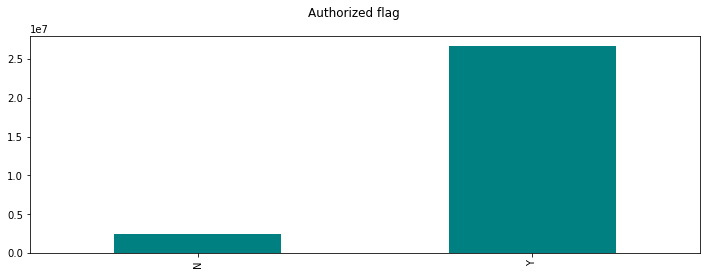

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4));
df_historical_transactions['authorized_flag'].value_counts().sort_index().plot(kind='bar', ax=ax, color='teal', title='');
plt.suptitle('Authorized flag');
plt.show()

In [19]:
df_historical_transactions['authorized_flag'].value_counts(normalize=True)

Y    0.913545
N    0.086455
Name: authorized_flag, dtype: float64

In [20]:
# let's convert the authorized_flag to a binary value.
df_historical_transactions['authorized_flag'] = df_historical_transactions['authorized_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [21]:
autorized_card_rate = df_historical_transactions.groupby(['card_id'])['authorized_flag'].mean().sort_values()
autorized_card_rate.head(20)

card_id
C_ID_744d26ea32    0.030488
C_ID_bb8dd137c9    0.037037
C_ID_e56202cd39    0.042105
C_ID_4feacff118    0.050000
C_ID_c27b4f80f7    0.054545
C_ID_5ab09665de    0.064815
C_ID_6b0a61c92f    0.067073
C_ID_18cb630a80    0.069892
C_ID_74fa19fdc5    0.074468
C_ID_5135a41b16    0.074468
C_ID_df044f32ba    0.075472
C_ID_9df7a3ff5d    0.076503
C_ID_3e01e61aca    0.077348
C_ID_2cb58dfc19    0.083086
C_ID_4ab260b799    0.085714
C_ID_199f286f1e    0.086207
C_ID_de6fe55adb    0.086420
C_ID_f2bee63d47    0.086957
C_ID_7a796c720b    0.088889
C_ID_6ce1a11dbc    0.096154
Name: authorized_flag, dtype: float64

In [22]:
print("Cards with low to 50/50 no. of authorized transactions {}".format(len([1 for x in autorized_card_rate if x < 0.50])))

Cards with low to 50/50 no. of authorized transactions 3888


In [23]:
print("Cards with perfect authorized transactions {}".format(len([1 for x in autorized_card_rate if x > 0.99999])))

Cards with perfect authorized transactions 49839


Installments

In [24]:
df_historical_transactions['installments'].value_counts()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

Observation:
what are -1 and 999??? Are they filling in for missing values??

In [25]:
df_historical_transactions.groupby(['installments'])['authorized_flag'].mean()

installments
-1      0.885692
 0      0.928032
 1      0.907024
 2      0.884020
 3      0.862254
 4      0.819903
 5      0.809183
 6      0.779732
 7      0.693196
 8      0.692439
 9      0.663721
 10     0.702021
 11     0.660241
 12     0.653694
 999    0.031915
Name: authorized_flag, dtype: float64

On the other hand it seems that 999 could mean fraud transactions, considering only 3% of these transactions were approved. One more interesting thing is that the higher the number of installments is, the lower is the approval rate.

Purchase Amount

Purchase_amount is normalized.

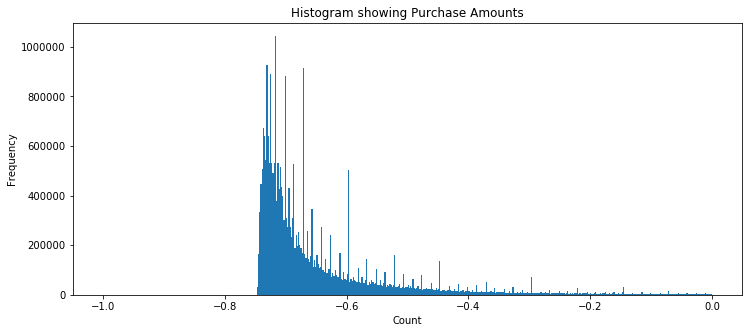

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(df_historical_transactions['purchase_amount'].values, bins=500, range=(-1, 0))
plt.title('Histogram showing Purchase Amounts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [27]:
for i in [-1, 0]:
    n = df_historical_transactions.loc[df_historical_transactions['purchase_amount'] < i].shape[0]
    print(f"There are {n} transactions with purchase_amount less than {i}.")
for i in [0, 10, 100]:
    n = df_historical_transactions.loc[df_historical_transactions['purchase_amount'] > i].shape[0]
    print(f"There are {n} transactions with purchase_amount more than {i}.")

There are 0 transactions with purchase_amount less than -1.
There are 28036884 transactions with purchase_amount less than 0.
There are 1075467 transactions with purchase_amount more than 0.
There are 14924 transactions with purchase_amount more than 10.
There are 1183 transactions with purchase_amount more than 100.


Observation:
- It seems that almost all transactions have purchase amount in range (-1, 0). Quite a strong normalization and high outliers, which will need to be processed.

Categories

In [28]:
df_historical_transactions['category_1'].value_counts()

N    27028332
Y     2084029
Name: category_1, dtype: int64

In [29]:
nan_rows = df_historical_transactions[df_historical_transactions['category_1'].isnull()]
print("Number of category_1 rows with null values: {} ".format(len(nan_rows.values)))

Number of category_1 rows with null values: 0 


In [30]:
map_dict = {'Y': 0, 'N': 1}
df_historical_transactions['category_1'] = df_historical_transactions['category_1'].apply(lambda x: map_dict[x])
df_historical_transactions.groupby(['category_1']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_1                                                                 
0                -0.419327    22.087594   2084029        0.748578  0.433830
1                 0.071540  1166.016045  27028332        0.926265  0.261339

In [31]:
df_historical_transactions['category_2'].value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [32]:
nan_rows = df_historical_transactions[df_historical_transactions['category_2'].isnull()]
print("Number of category_2 rows with null values: {} ".format(len(nan_rows.values)))

Number of category_2 rows with null values: 2652864 


In [33]:
df_historical_transactions.groupby(['category_2']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_2                                                                 
1.0               0.149570  1548.714128  15177199        0.927505  0.259306
2.0              -0.165690    89.285770   1026535        0.906225  0.291515
3.0               0.180375   210.616100   3911795        0.918857  0.273055
4.0              -0.158951   141.945606   2618053        0.927634  0.259094
5.0              -0.104457   162.428785   3725915        0.934260  0.247826

In [34]:
df_historical_transactions['category_3'].value_counts()

A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

In [35]:
nan_rows = df_historical_transactions[df_historical_transactions['category_3'].isnull()]
print("Number of category_3 rows with null values: {} ".format(len(nan_rows.values)))

Number of category_3 rows with null values: 178159 


In [36]:
map_dict = {'A': 0, 'B': 1, 'C': 2, 'nan': 3}
df_historical_transactions['category_3'] = df_historical_transactions['category_3'].apply(lambda x: map_dict[str(x)])
df_historical_transactions.groupby(['category_3']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_3                                                                 
0                 0.361926  1541.485188  15411747        0.928032  0.258436
1                -0.404556   104.062692  11677522        0.907024  0.290399
2                 0.106023    24.047655   1844933        0.836498  0.369824
3                 0.058447     2.191567    178159        0.885692  0.318186

Quick summary of the rest of the properties in historical transactions

In [37]:
for col in ['city_id', 'merchant_category_id', 'merchant_id', 'state_id', 'subsector_id']:
    print(f"There are {df_historical_transactions[col].nunique()} unique values in {col}.")

There are 308 unique values in city_id.
There are 327 unique values in merchant_category_id.
There are 326311 unique values in merchant_id.
There are 25 unique values in state_id.
There are 41 unique values in subsector_id.


##### Merchant


In [38]:
e = pd.read_excel('./input/Data_Dictionary.xlsx', sheetname='merchant')
e

,merchants.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,merchant_id,Unique merchant identifier
3,merchant_group_id,Merchant group (anonymized )
4,merchant_category_id,Unique identifier for merchant category (anony...
5,subsector_id,Merchant category group (anonymized )
6,numerical_1,anonymized measure
7,numerical_2,anonymized measure
8,category_1,anonymized category
9,most_recent_sales_range,Range of revenue (monetary units) in last acti...


In [39]:
#Loading historical transaction Data


df_merchants = pd.read_csv('./input/merchants.csv')
print(f'{df_historical_transactions.shape[0]} samples in data')
df_merchants.head(12)

29112361 samples in data


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5.0
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,N,E,E,NaN,...,NaN,4.833333,6,NaN,6.333333,12,N,60,16,1.0
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,N,E,E,NaN,...,NaN,189.916667,6,NaN,197.000000,7,N,248,15,1.0
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN


In [40]:
df_merchants['numerical_1'].describe()

count    334696.000000
mean          0.011476
std           1.098154
min          -0.057471
25%          -0.057471
50%          -0.057471
75%          -0.047556
max         183.735111
Name: numerical_1, dtype: float64

In [42]:
df_merchants['numerical_2'].describe()

count    334696.000000
mean          0.008103
std           1.070497
min          -0.057471
25%          -0.057471
50%          -0.057471
75%          -0.047556
max         182.079322
Name: numerical_2, dtype: float64

shown


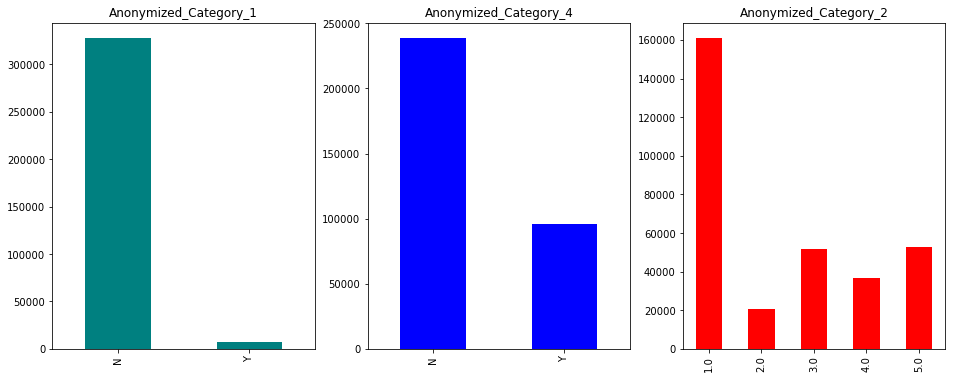

In [52]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
df_merchants['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='Anonymized_Category_1')
df_merchants['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='red', title='Anonymized_Category_2')
df_merchants['category_4'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='blue', title='Anonymized_Category_4')
print('shown')
plt.show()

In [54]:
data1 = df_merchants[df_merchants['category_2']==1]
data2 = df_merchants[df_merchants['category_2']==2]
data3 = df_merchants[df_merchants['category_2']==3]
data4 = df_merchants[df_merchants['category_2']==4]
data5 = df_merchants[df_merchants['category_2']==5]

shown


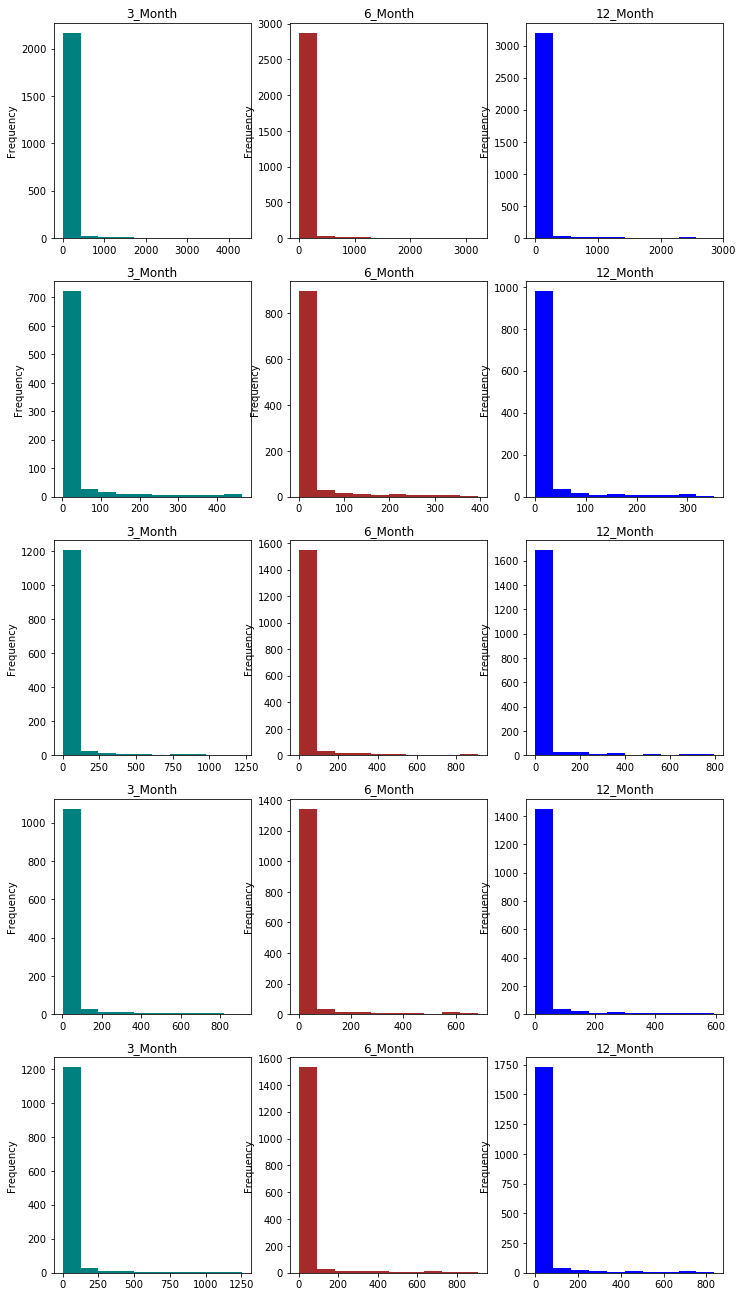

In [62]:
fig, ax = plt.subplots(5, 3, figsize = (12,23))
data1['avg_sales_lag3'].value_counts().sort_index().plot(kind='hist', ax=ax[0][0], color='teal', title='3_Month');
data1['avg_sales_lag6'].value_counts().sort_index().plot(kind='hist', ax=ax[0][1], color='brown', title='6_Month');
data1['avg_sales_lag12'].value_counts().sort_index().plot(kind='hist', ax=ax[0][2], color='blue', title='12_Month');
data2['avg_sales_lag3'].value_counts().sort_index().plot(kind='hist', ax=ax[1][0], color='teal', title='3_Month');
data2['avg_sales_lag6'].value_counts().sort_index().plot(kind='hist', ax=ax[1][1], color='brown', title='6_Month');
data2['avg_sales_lag12'].value_counts().sort_index().plot(kind='hist', ax=ax[1][2], color='blue', title='12_Month');
data3['avg_sales_lag3'].value_counts().sort_index().plot(kind='hist', ax=ax[2][0], color='teal', title='3_Month');
data3['avg_sales_lag6'].value_counts().sort_index().plot(kind='hist', ax=ax[2][1], color='brown', title='6_Month');
data3['avg_sales_lag12'].value_counts().sort_index().plot(kind='hist', ax=ax[2][2], color='blue', title='12_Month');
data4['avg_sales_lag3'].value_counts().sort_index().plot(kind='hist', ax=ax[3][0], color='teal', title='3_Month');
data4['avg_sales_lag6'].value_counts().sort_index().plot(kind='hist', ax=ax[3][1], color='brown', title='6_Month');
data4['avg_sales_lag12'].value_counts().sort_index().plot(kind='hist', ax=ax[3][2], color='blue', title='12_Month');
data5['avg_sales_lag3'].value_counts().sort_index().plot(kind='hist', ax=ax[4][0], color='teal', title='3_Month');
data5['avg_sales_lag6'].value_counts().sort_index().plot(kind='hist', ax=ax[4][1], color='brown', title='6_Month');
data5['avg_sales_lag12'].value_counts().sort_index().plot(kind='hist', ax=ax[4][2], color='blue', title='12_Month');
print('shown')
plt.show()

shown


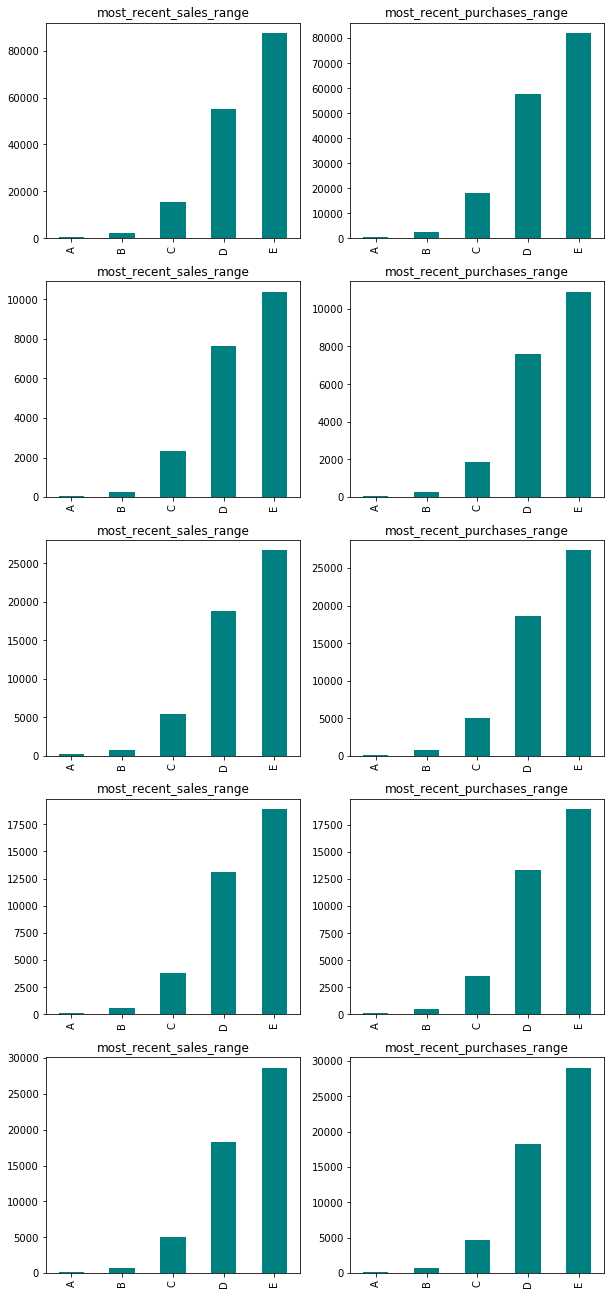

In [65]:
fig, ax = plt.subplots(5, 2, figsize = (10, 23));
data1['most_recent_sales_range'].value_counts().sort_index().plot(kind='bar', ax=ax[0][0], color='teal', title='most_recent_sales_range');
data1['most_recent_purchases_range'].value_counts().sort_index().plot(kind='bar', ax=ax[0][1], color='teal', title='most_recent_purchases_range');
data2['most_recent_sales_range'].value_counts().sort_index().plot(kind='bar', ax=ax[1][0], color='teal', title='most_recent_sales_range');
data2['most_recent_purchases_range'].value_counts().sort_index().plot(kind='bar', ax=ax[1][1], color='teal', title='most_recent_purchases_range');
data3['most_recent_sales_range'].value_counts().sort_index().plot(kind='bar', ax=ax[2][0], color='teal', title='most_recent_sales_range');
data3['most_recent_purchases_range'].value_counts().sort_index().plot(kind='bar', ax=ax[2][1], color='teal', title='most_recent_purchases_range');
data4['most_recent_sales_range'].value_counts().sort_index().plot(kind='bar', ax=ax[3][0], color='teal', title='most_recent_sales_range');
data4['most_recent_purchases_range'].value_counts().sort_index().plot(kind='bar', ax=ax[3][1], color='teal', title='most_recent_purchases_range');
data5['most_recent_sales_range'].value_counts().sort_index().plot(kind='bar', ax=ax[4][0], color='teal', title='most_recent_sales_range');
data5['most_recent_purchases_range'].value_counts().sort_index().plot(kind='bar', ax=ax[4][1], color='teal', title='most_recent_purchases_range');
print('shown')
plt.show()

### Cleaning and fixing data

**Train file**

- There are no null values in the train data!

Change the datatype to categories for the features

In [66]:
df_train['feature_1'] = df_train['feature_1'].astype('category')
df_train['feature_2'] = df_train['feature_2'].astype('category')
df_train['feature_3'] = df_train['feature_3'].astype('category')

**Test file**

In [67]:
nan_rows = df_test[df_test['first_active_month'].isnull()]
print(nan_rows)

      first_active_month          card_id  feature_1  feature_2  feature_3
11578                NaT  C_ID_c27b4f80f7          5          2          1


Fill missing value with the first data instance having the same values of three features.

In [68]:
df_test.loc[df_test['first_active_month'].isnull(), 'first_active_month'] = df_test.loc[(df_test['feature_1'] == 5) & (df_test['feature_2'] == 2) & (df_test['feature_3'] == 1), 'first_active_month'].min()

In [69]:
df_test['feature_1'] = df_test['feature_1'].astype('category')
df_test['feature_2'] = df_test['feature_2'].astype('category')
df_test['feature_3'] = df_test['feature_3'].astype('category')

**Historical Transactions**

In [70]:
df_historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         int64
card_id                 object
city_id                 int64
category_1              int64
installments            int64
category_3              int64
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(9), object(3)
memory usage: 3.0+ GB


In [71]:
df_historical_transactions['installments'] = df_historical_transactions['installments'].astype('category')
df_historical_transactions['purchase_date'] = pd.to_datetime(df_historical_transactions['purchase_date'])

df_historical_transactions['category_1'] = df_historical_transactions['category_1'].astype('int64')
df_historical_transactions['category_2'] = df_historical_transactions['category_2'].astype('float64')
df_historical_transactions['category_3'] = df_historical_transactions['category_3'].astype('int64')

In [72]:
df_historical_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         int64
card_id                 object
city_id                 int64
category_1              int64
installments            category
category_3              int64
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           datetime64[ns]
category_2              float64
state_id                int64
subsector_id            int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(8), object(2)
memory usage: 2.8+ GB


**New Merchant Transactions**

In [73]:
df_merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int64
merchant_category_id           334696 non-null int64
subsector_id                   334696 non-null int64
numerical_1                    334696 non-null float64
numerical_2                    334696 non-null float64
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float64
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int64
avg_sales_lag6                 334683 non-null float64
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int64
avg_sales_lag12                334683 non-null float64
avg_purchases_lag12    

In [75]:
import numpy as np
# encoding categories.
map_dict = {'Y': 0, 'N': 1}
df_merchants['category_1'] = df_merchants['category_1'].apply(lambda x: map_dict[x])
df_merchants.loc[df_merchants['category_2'].isnull(), 'category_2'] = 0
df_merchants['category_4'] = df_merchants['category_4'].apply(lambda x: map_dict[x])

df_merchants['avg_sales_lag3'] = df_merchants['avg_sales_lag3'].fillna(0)
df_merchants['avg_sales_lag6'] = df_merchants['avg_sales_lag6'].fillna(0)
df_merchants['avg_sales_lag12'] = df_merchants['avg_sales_lag12'].fillna(0)

df_merchants.loc[df_merchants['avg_purchases_lag3'] == np.inf, 'avg_purchases_lag3'] = 6000
df_merchants.loc[df_merchants['avg_purchases_lag6'] == np.inf, 'avg_purchases_lag6'] = 6000
df_merchants.loc[df_merchants['avg_purchases_lag12'] == np.inf, 'avg_purchases_lag12'] = 6000

df_merchants['avg_purchases_lag3'] = df_merchants['avg_purchases_lag3'].fillna(0)
df_merchants['avg_purchases_lag6'] = df_merchants['avg_purchases_lag6'].fillna(0)
df_merchants['avg_purchases_lag12'] = df_merchants['avg_purchases_lag12'].fillna(0)

df_merchants['location'] = df_merchants['category_1'].astype(str) + '_' + df_merchants['category_2'].astype(str) + '_' + df_merchants['state_id'].astype(str) + '_' + df_merchants['city_id'].astype(str)

In [84]:
df_merchants.head(10)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2,location
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,1,E,E,-0.40,...,18.666667,6,-2.32,13.916667,12,1,242,9,1.0,1_1.0_9_242
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,1,E,E,-0.72,...,1.291667,6,-0.57,1.687500,12,1,22,16,1.0,1_1.0_16_22
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,1,E,E,-82.13,...,260.000000,2,-82.13,260.000000,2,1,-1,5,5.0,1_5.0_5_-1
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,0,E,E,0.00,...,4.666667,6,0.00,3.833333,12,0,-1,-1,0.0,0_0.0_-1_-1
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,0,E,E,0.00,...,0.361111,6,0.00,0.347222,12,0,-1,-1,0.0,0_0.0_-1_-1
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,1,E,E,0.00,...,3.666667,6,0.00,3.833333,12,0,160,21,5.0,1_5.0_21_160
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,1,E,E,0.00,...,4.833333,6,0.00,6.333333,12,1,60,16,1.0,1_1.0_16_60
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,0,E,E,0.00,...,1.666667,6,0.00,1.500000,11,0,-1,-1,0.0,0_0.0_-1_-1
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,1,E,E,0.00,...,189.916667,6,0.00,197.000000,7,1,248,15,1.0,1_1.0_15_248
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,0,E,E,0.00,...,1.000000,2,0.00,1.000000,2,0,-1,-1,0.0,0_0.0_-1_-1


### Feature engineering

Train & Test data

In [85]:
max_date = df_train['first_active_month'].dt.date.max()

def process_main(df):
    date_parts = ["year", "weekday", "month"]
    for part in date_parts:
        part_col = 'first_active_month' + "_" + part
        df[part_col] = getattr(df['first_active_month'].dt, part).astype(int)
            
    df['elapsed_time'] = (max_date - df['first_active_month'].dt.date).dt.days
    
    return df

df_train = process_main(df_train)
df_test = process_main(df_test)

Historical Transactions

In [86]:
import numpy as np
import datetime

def aggregate_historical_transactions(trans, prefix):
    # more features from this kernel: https://www.kaggle.com/chauhuynh/my-first-kernel-3-699
    trans['purchase_month'] = trans['purchase_date'].dt.month
    trans['month_diff'] = ((datetime.datetime.today() - trans['purchase_date']).dt.days)//30
    trans['month_diff'] += trans['month_lag']
    trans.loc[:, 'purchase_date'] = pd.DatetimeIndex(trans['purchase_date']). \
                                        astype(np.int64) * 1e-9
    trans['installments'] = trans['installments'].astype(int)

    trans = pd.get_dummies(trans, columns=['category_2', 'category_3'])
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'category_1': ['sum', 'mean'],
        'category_2_1.0': ['mean', 'sum'],
        'category_2_2.0': ['mean', 'sum'],
        'category_2_3.0': ['mean', 'sum'],
        'category_2_4.0': ['mean', 'sum'],
        'category_2_5.0': ['mean', 'sum'],
        'category_3_1': ['sum', 'mean'],
        'category_3_2': ['sum', 'mean'],
        'category_3_3': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
        'installments': ['sum', 'mean', 'max', 'min', 'std'],
        'purchase_month': ['mean', 'max', 'min', 'std'],
        'purchase_date': [np.ptp, 'max', 'min'],
        'month_lag': ['min', 'max'],
        'merchant_category_id': ['nunique'],
        'state_id': ['nunique'],
        'subsector_id': ['nunique'],
        'city_id': ['nunique'],
        'month_diff': ['min', 'max', 'mean']
    }
    agg_trans = trans.groupby(['card_id']).agg(agg_func)
    agg_trans.columns = [prefix + '_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (trans.groupby('card_id')
          .size()
          .reset_index(name='{}transactions_count'.format(prefix)))

    agg_trans = pd.merge(df, agg_trans, on='card_id', how='left')

    return agg_trans

In [87]:
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_lag'])
    history['installments'] = history['installments'].astype(int)
    agg_func = {
            'purchase_amount': ['count', 'sum', 'mean', 'min', 'max', 'std'],
            'installments': ['count', 'sum', 'mean', 'min', 'max', 'std'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)

    final_group = intermediate_group.groupby('card_id').agg(['mean', 'std'])
    final_group.columns = ['_'.join(col).strip() for col in final_group.columns.values]
    final_group.reset_index(inplace=True)
    
    return final_group

final_group = aggregate_per_month(df_historical_transactions) 

In [88]:
history = aggregate_historical_transactions(df_historical_transactions, prefix='hist_')

In [89]:
df_train = pd.merge(df_train, history, on='card_id', how='left')
df_test = pd.merge(df_test, history, on='card_id', how='left')

In [90]:
df_train = pd.merge(df_train, final_group, on='card_id')
df_test = pd.merge(df_test, final_group, on='card_id')

Merchant Info

In [ ]:
def aggregate_merchant_data(trans, prefix):
    trans['purchase_month'] = trans['purchase_date'].dt.month
    trans['month_diff'] = ((datetime.datetime.today() - trans['purchase_date']).dt.days)//30
    trans['month_diff'] += trans['month_lag']
    trans.loc[:, 'purchase_date'] = pd.DatetimeIndex(trans['purchase_date']).astype(np.int64) * 1e-9
    trans['installments'] = trans['installments'].astype(int)

    trans = pd.get_dummies(trans, columns=['category_2', 'category_3'])
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'category_1': ['sum', 'mean'],
        'category_2_1.0': ['mean', 'sum'],
        'category_2_2.0': ['mean', 'sum'],
        'category_2_3.0': ['mean', 'sum'],
        'category_2_4.0': ['mean', 'sum'],
        'category_2_5.0': ['mean', 'sum'],
        'category_3_1': ['sum', 'mean'],
        'category_3_2': ['sum', 'mean'],
        'category_3_3': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
        'installments': ['sum', 'mean', 'max', 'min', 'std'],
        'purchase_month': ['mean', 'max', 'min', 'std'],
        'purchase_date': [np.ptp, 'max', 'min'],
        'month_lag': ['min', 'max'],
        'merchant_category_id': ['nunique'],
        'state_id': ['nunique'],
        'subsector_id': ['nunique'],
        'city_id': ['nunique'],
        'month_diff': ['min', 'max', 'mean']
    }
    agg_trans = trans.groupby(['card_id']).agg(agg_func)
    agg_trans.columns = [prefix + '_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (trans.groupby('card_id')
          .size()
          .reset_index(name='{}transactions_count'.format(prefix)))

    agg_trans = pd.merge(df, agg_trans, on='card_id', how='left')

    return agg_trans

In [ ]:
merchants_aggr = aggregate_merchant_data(df_merchants, prefix='merchant_')

In [92]:

df_train = pd.merge(df_train, merchants_aggr, on='merchant_id', how='left')
df_test = pd.merge(df_test, merchants_aggr, on='merchant_id', how='left')


KeyError: 'merchant_id'

### Define models and evaluate

In [ ]:
df_train.head()

In [ ]:
for col in df_train.columns:
    if df_train[col].isnull().any():
        df_train[col] = df_train[col].fillna(0)

In [ ]:
for col in df_test.columns:
    if df_test[col].isnull().any():
        df_test[col] = df_test[col].fillna(0)

In [ ]:
y = df_train['target']

In [ ]:
col_to_drop = ['first_active_month', 'card_id', 'target']

In [ ]:
for col in col_to_drop:
    if col in df_train.columns:
        df_train.drop([col], axis=1, inplace=True)
    if col in df_test.columns:
        df_test.drop([col], axis=1, inplace=True)

In [ ]:
df_train['feature_3'] = df_train['feature_3'].astype(int)
df_test['feature_3'] = df_test['feature_3'].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_feats = ['feature_1', 'feature_2']

for col in categorical_feats:
    lbl = LabelEncoder()
    lbl.fit(list(df_train[col].values.astype('str')) + list(df_test[col].values.astype('str')))
    df_train[col] = lbl.transform(list(df_train[col].values.astype('str')))
    df_test[col] = lbl.transform(list(df_test[col].values.astype('str')))

In [ ]:
df_train.head()

In [ ]:
#for col in ['newpurchase_amount_max', 'newpurchase_date_max', 'purchase_amount_max_mean']:
#    df_train[col + '_to_mean'] = df_train[col] / df_train[col].mean()
#    df_test[col + '_to_mean'] = df_test[col] / df_test[col].mean()

#### Basic LGB model

In [ ]:
X = df_train
X_test = df_test

import sklearn
print(sklearn.__version__)

In [ ]:
from sklearn.model_selection import KFold

n_fold = 9
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
import lightgbm as lgb
import xgboost as xgb
import catboost
import seaborn as sns 
import time

def train_model(X=X, X_test=X_test, y=y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False):

    oof = np.zeros(len(X))
    prediction = np.zeros(len(X_test))
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=1000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test), ntree_limit=model.best_ntree_limit)
            
        if model_type == 'rcv':
            model = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100.0), scoring='neg_mean_squared_error', cv=3)
            model.fit(X_train, y_train)
            print(model.alpha_)

            y_pred_valid = model.predict(X_valid)
            score = mean_squared_error(y_valid, y_pred_valid) ** 0.5
            print(f'Fold {fold_n}. RMSE: {score:.4f}.')
            print('')
            
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = catboost.CatBoostRegressor(iterations=20000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12))
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
            plt.title('LGB Features (avg over folds)')
            plt.show()
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

In [ ]:
params = {'num_leaves': 50,
         'min_data_in_leaf': 70,
         'objective': 'regression',
         'max_depth': 12,
         'learning_rate': 0.0075,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 5,
         "bagging_fraction": 0.8,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         'min_child_weight': 5,
         'reg_alpha': 1.13,
         'reg_lambda': 0.36,
         'subsample': 0.88,}

In [ ]:
# does not consider new_merchant_transaction  or merchant data
# CV mean score: 3.7437, std: 0.0589, 'max_depth': 18, 'learning_rate': 0.018545526395058548, n_fold = 5
# CV mean score: 3.7445, std: 0.0583, 'max_depth': 18, 'learning_rate': 0.03, n_fold = 5
# CV mean score: 3.7436, std: 0.0585, 'max_depth': 12, 'learning_rate': 0.03, n_fold = 5
# CV mean score: 3.7426, std: 0.0575, 'max_depth': 12, 'learning_rate': 0.01, n_fold = 5
# CV mean score: 3.7424, std: 0.0583, 'max_depth': 12, 'learning_rate': 0.005, n_fold = 5
# CV mean score: 3.7405, std: 0.1007, 'max_depth': 12, 'learning_rate': 0.0075, n_fold = 9

# does not consider merchant data
# CV mean score: 3.6572, std: 0.1065, 'max_depth': 12, 'learning_rate': 0.0075, n_fold = 9


oof_lgb, prediction_lgb, feature_importance = train_model(params=params, model_type='lgb', plot_feature_importance=True)


In [ ]:
# lgb.csv does not consider new_merchant_transaction  or merchant data
# lgb1.csv does not consider merchant data

submission = pd.read_csv('./input/sample_submission.csv')
submission['target'] = prediction_lgb
submission.to_csv('lgb_merchant.csv', index=False)


In [ ]:
xgb_params = {'eta': 0.01, 'max_depth': 11, 'subsample': 0.8, 'colsample_bytree': 0.8, 
          'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True, 'nthread': 4}
oof_xgb, prediction_xgb = train_model(params=xgb_params, model_type='xgb')

In [ ]:
submission['target'] = prediction_xgb
submission.to_csv('xgb.csv', index=False)

In [ ]:
oof_rcv, prediction_rcv = train_model(params=None, model_type='rcv')

In [ ]:
submission['target'] = prediction_rcv
submission.to_csv('rcv.csv', index=False)

In [ ]:
cat_params = {'learning_rate': 0.02,
              'depth': 13,
              'l2_leaf_reg': 10,
              'bootstrap_type': 'Bernoulli',
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 50,
              'random_seed': 11,
              'allow_writing_files': False}
oof_cat, prediction_cat = train_model(params=cat_params, model_type='cat')

In [ ]:
submission['target'] = prediction_cat
submission.to_csv('cat.csv', index=False)

In [ ]:
submission['target'] = (prediction_lgb + prediction_xgb + prediction_rcv + prediction_cat) / 4
submission.to_csv('blend.csv', index=False)

Let's stack the results

In [ ]:
train_stack = np.vstack([oof_lgb, oof_xgb, oof_rcv, oof_cat]).transpose()
train_stack = pd.DataFrame(train_stack)
test_stack = np.vstack([prediction_lgb, prediction_xgb, prediction_rcv, prediction_cat]).transpose()
test_stack = pd.DataFrame(test_stack)

In [ ]:
oof_lgb_stack, prediction_lgb_stack = train_model(X=train_stack, X_test=test_stack, params=params, model_type='lgb')

In [ ]:
submission['target'] = prediction_lgb_stack
submission.to_csv('stacker_lgb.csv', index=False)